# 1. Obtain and review raw data

In [5]:
# Import pandas
import pandas as pd

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv('C:\\Users\\USER\\Desktop\\cardioActivities.csv', parse_dates=['Date'], index_col='Date')

# First look at exported data: select sample of 3 random rows 
display(df_activities.sample(3))

# Print DataFrame summary
df_activities.info()

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2015-05-13 18:39:34,edd6a664-91fa-4978-9a3d-a9a9e97da0cb,Running,NaN,12.71,1:09:15,5:27,11.01,875.0,108,158.0,NaN,NaN,2015-05-13-183934.gpx
2015-08-15 18:46:21,318bf8f5-6344-4f1e-8fb8-f52d7a38ebc1,Cycling,NaN,13.72,38:39,2:49,21.30,313.0,139,NaN,NaN,NaN,2015-08-15-184621.gpx
2018-01-24 18:13:26,6d853ab2-e3c3-4206-af59-e22096f1b1d5,Running,NaN,11.59,1:10:30,6:05,9.86,847.0,196,143.0,NaN,TomTom MySports Watch,2018-01-24-181326.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

# 2. Data preprocessing

In [6]:
# Define list of columns to be deleted
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Delete unnecessary columns
df_activities.drop(cols_to_drop, axis=1, inplace=True)

# Count types of training activities
display(df_activities.Type.value_counts())

# Rename 'Other' type to 'Unicycling'
df_activities['Type'] = df_activities['Type'].str.replace('Other', 'Unicycling', regex=False)

# Count missing values for each column
df_activities.isnull().sum(axis=0)

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

# 3. Dealing with missing values

In [7]:
# Calculate sample means for heart rate for each training activity type 
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)

# Count missing values for each column in running data
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

# 4. Plot running data

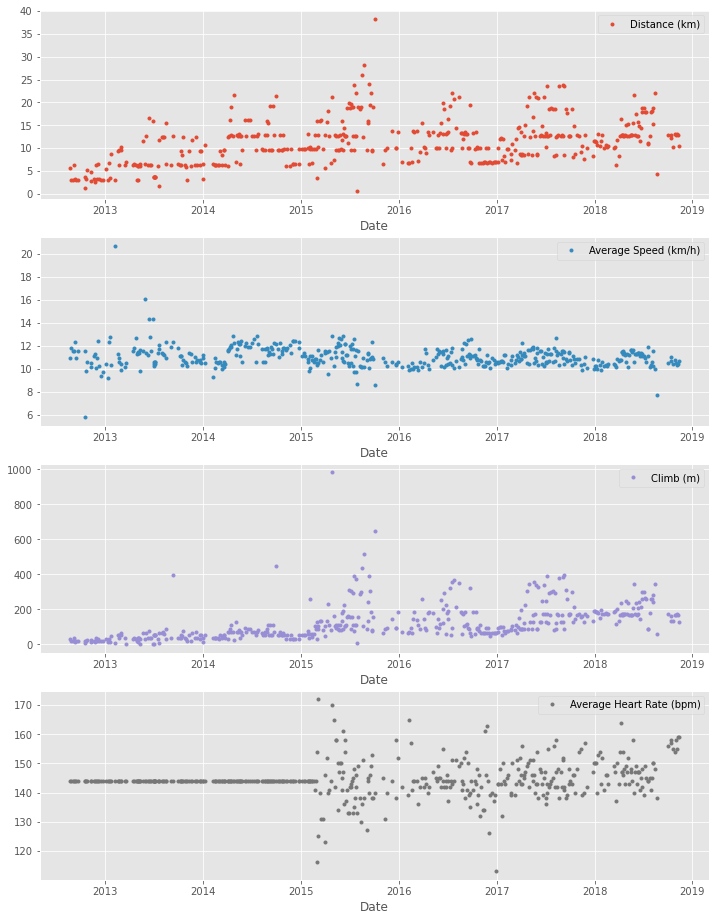

In [12]:
%matplotlib inline

# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run

# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )

# Show plot
plt.show()


# 5. Running statistics

In [13]:
# Prepare running data for the last 4 years
runs_subset_2015_2018 = df_run['2018':'2015']

# Calculate annual statistics
print('How my average run looks in last 4 years:')
display(runs_subset_2015_2018.resample('A').mean())

# Calculate weekly statistics
print('Weekly averages of last 4 years:')
display(runs_subset_2015_2018.resample('W').mean().mean())

# Mean weekly counts
weekly_counts_average = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_average)

How my average run looks in last 4 years:


C:\Users\USER\AppData\Local\Temp\ipykernel_2540\4093167071.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  runs_subset_2015_2018 = df_run['2018':'2015']


,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,


Weekly averages of last 4 years:


Type                        NaN
Distance (km)               NaN
Duration                    NaN
Average Pace                NaN
Average Speed (km/h)        NaN
Climb (m)                   NaN
Average Heart Rate (bpm)    NaN
dtype: object

How many trainings per week I had on average: nan


# 6. Visualization with averages

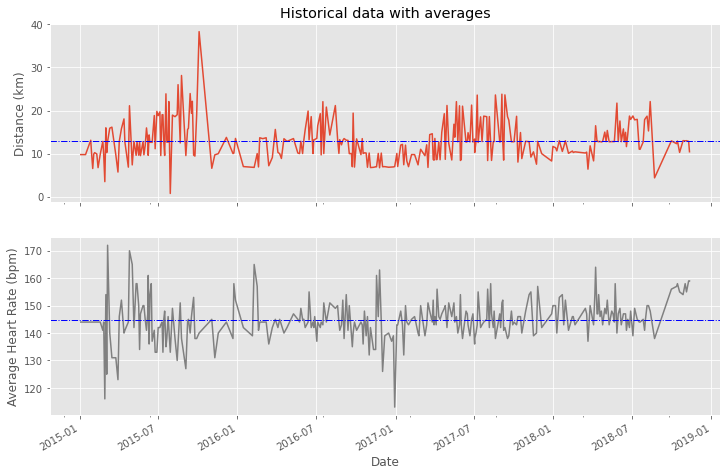

In [18]:
# Prepare data
runs_subset_2015_2018 = df_run.query("(Date <= 2019) and (Date >= 2015)")
runs_distance = runs_subset_2015_2018["Distance (km)"]
runs_hr = runs_subset_2015_2018["Average Heart Rate (bpm)"]

# Create plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot and customize first subplot
runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

# Show plot
plt.show()

# 7. Did I reach my goals?

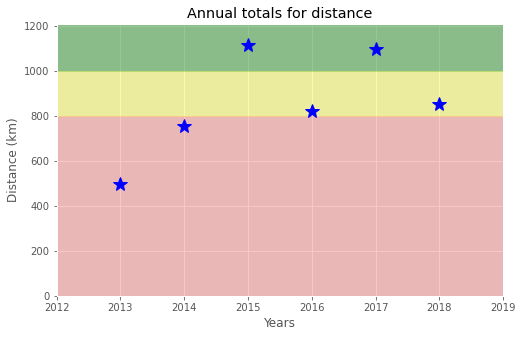

In [21]:
# Prepare data
df_run_dist_annual = df_run.query("(Date <= 2019) and (Date >= 2013)")["Distance (km)"].resample("A").sum()

# Create plot
fig = plt.figure(figsize=(8, 5))

# Plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)


# Show plot
plt.show()

# 8. Am I progressing?

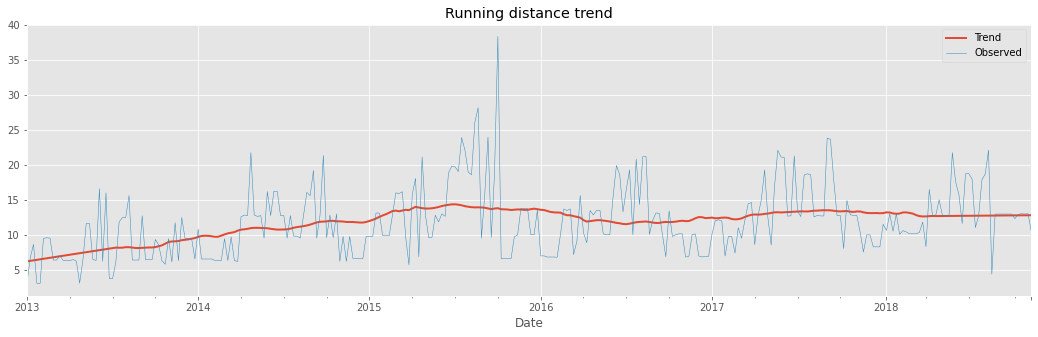

In [22]:
# Import required library
import statsmodels.api as sm

# Prepare data
df_run_dist_wkly = df_run.query("(Date <= 2019) and (Date >= 2013)")["Distance (km)"].resample("W").bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1)

# Create plot
fig = plt.figure(figsize=(18, 5))

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()

# 9. Training intensity

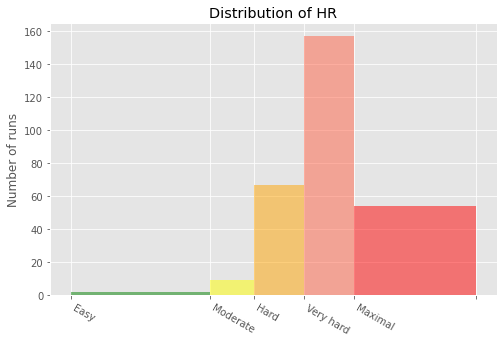

In [23]:
# Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal', ""]
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run.query("(Date <= 2019) and (Date >= '2015-03')")["Average Heart Rate (bpm)"]

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')

# Show plot
plt.show()

# 10. Detailed summary report

In [24]:
# Concatenating three DataFrames
df_run_walk_cycle = pd.concat([df_run, df_cycle, df_walk]).sort_index(ascending=False)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Calculating summary statistics for each type of activities 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
df_summary.stack()

Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    459.000000     459.000000
        max               20.720000    982.000000      38.320000
        mean              11.056296    124.788671      11.382353
        min                5.770000      0.000000       0.760000
        std                0.953273    103.382177       4.937853
        total                   NaN  57278.000000    5224.500000
Walking 25%                5.555000      7.000000       1.385000
        50%                5.970000     10.000000       1.485000
        75%                6.512500     15.500000       1.787500
        count             18.000000     18.000000      18.000000
        max                6.910000    112.000000       4.290000
        mean               5.549444     19.388889       1.858333
        min                1.040000      5.000000       1.220000
        std                1.459309     27.110100       0.880055
        total                   NaN    349.000000      33.450000

# 11. Fun facts

To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise.

These data (my running history) represent 6 years, 2 months and 21 days. And I remember how many running shoes I went through–7.

FUN FACTS
- Average distance: 11.38 km
- Longest distance: 38.32 km
- Highest climb: 982 m
- Total climb: 57,278 m
- Total number of km run: 5,224 km
- Total runs: 459
- Number of running shoes gone through: 7 pairs
The story of Forrest Gump is well known–the man, who for no particular reason decided to go for a "little run." His epic run duration was 3 years, 2 months and 14 days (1169 days). In the picture you can see Forrest’s route of 24,700 km.

FORREST RUN FACTS
- Average distance: 21.13 km
- Total number of km run: 24,700 km
- Total runs: 1169
- Number of running shoes gone through: ...
Assuming Forest and I go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.

In [26]:
# Count average shoes per lifetime (as km per pair) using our fun facts
average_shoes_lifetime = 5224 / 7

# Count number of shoes for Forrest's run distance
shoes_for_forrest_run = int(24700 / average_shoes_lifetime)

print('Forrest Gump would need {} pairs of shoes!'.format(shoes_for_forrest_run))

Forrest Gump would need 33 pairs of shoes!
